In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
train_images = train_images.reshape((50000,32,32*3)).astype('float32')/255
test_images=test_images.reshape((10000,32,32*3)).astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
input_shape = (32,32*3)
inputs = Input(shape=input_shape)
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10,activation='softmax')(rnn_layer)
model = Model(inputs=inputs,outputs=outputs)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images,train_labels,validation_split=0.1,epochs=5,batch_size=64)

Epoch 1/5
704/704 [==============================] - 57s 75ms/step - loss: 1.8107 - accuracy: 0.3366 - val_loss: 1.6998 - val_accuracy: 0.3796
Epoch 2/5
704/704 [==============================] - 51s 72ms/step - loss: 1.5643 - accuracy: 0.4328 - val_loss: 1.5242 - val_accuracy: 0.4442
Epoch 3/5
704/704 [==============================] - 48s 68ms/step - loss: 1.4589 - accuracy: 0.4737 - val_loss: 1.4021 - val_accuracy: 0.5012
Epoch 4/5
704/704 [==============================] - 49s 69ms/step - loss: 1.3842 - accuracy: 0.5019 - val_loss: 1.3582 - val_accuracy: 0.5194
Epoch 5/5
704/704 [==============================] - 60s 85ms/step - loss: 1.3221 - accuracy: 0.5224 - val_loss: 1.3442 - val_accuracy: 0.5134


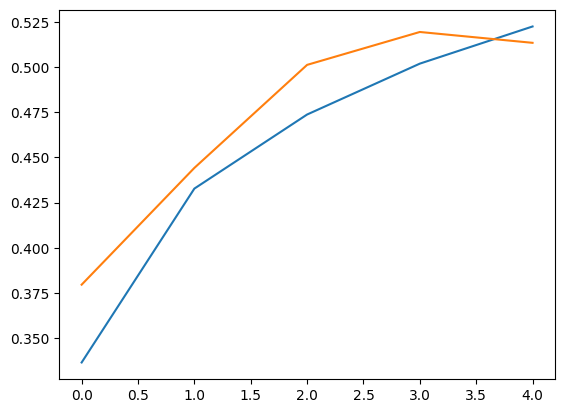

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

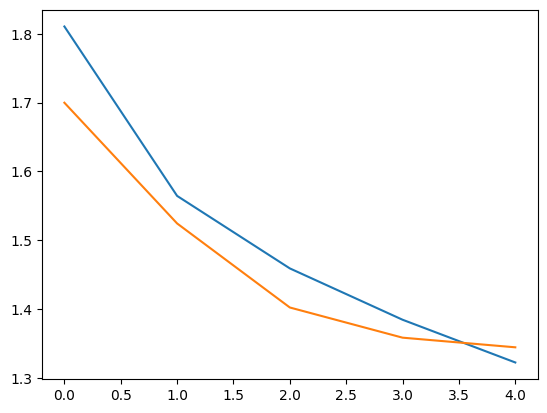

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [8]:
y_pred = model.predict(test_images)

313/313 [==============================] - 8s 23ms/step


In [9]:
import numpy as np
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([8, 1, 8, ..., 5, 6, 7])

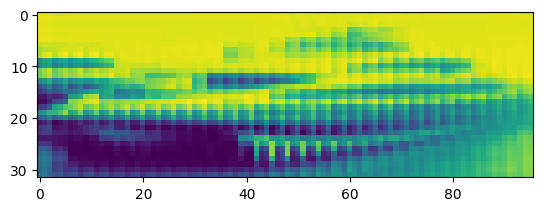

In [10]:
plt.imshow(test_images[1])

In [12]:
test_labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [13]:
import numpy as np
y_test = np.argmax(test_labels,axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [15]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
class_names[y_test[1]]

'ship'